<div style="text-align:center; border-radius:0px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #00131E; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;">
    <div style="font-size:150%; color:#FEE100"><b>Transaction Data Analysis: Exploring Patterns in Banking Operations</b></div>
    <div>This project is part of my personal portfolio development, focusing on enhancing my data analysis expertise through Python. I welcome feedback and suggestions for improvement!</div>
    <div style="font-size:90%; margin-top:8px; color:#FEE100CC">Skills demonstrated: Pandas, NumPy, Data Visualization, ETL Processes</div>
</div>

## Table of Contents
1. [Introduction and Initial Analysis](#Introduction)
    - [Data Loading](#Data-Loading-and-Initial-Analysis)
    - [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
    - [Geolocation Processing](#Geolocation-Processing)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Fraud Analysis](#Fraud-Analysis)
    - [Correlation Analysis](#Correlation-Analysis-between-Columns)
6. [Feature Engineering](#Feature-Engineering)
7. [Conclusion](#Conclusion)

# Introduction
---

This dataset contains **1,000 synthetic banking transactions**, including transfers, withdrawals, and deposits. Each transaction is described by attributes such as the sender and receiver account IDs, transaction amount, timestamp, and status (success or failure). Additionally, the dataset includes features like fraud flags, geolocation, device type, network performance metrics (latency and bandwidth), and a masked PIN code. 

Designed for **financial analysis**, this dataset is ideal for **exploring patterns** in transaction behavior, **detecting fraudulent activities**, and evaluating network performance in banking operations.

Columns descriptions:

| Column Name             | Description                                                                 |
|-------------------------|-----------------------------------------------------------------------------|
| Transaction ID          | Unique identifier for each transaction, ensuring traceability.             |
| Sender Account ID       | The account number of the transaction sender.                              |
| Receiver Account ID     | The account number of the transaction receiver.                            |
| Transaction Amount      | The monetary value involved in the transaction.                            |
| Transaction Type       | The type of transaction—Transfer, Withdrawal, or Deposit.                  |
| Timestamp              | The exact date and time the transaction occurred.                          |
| Transaction Status     | Indicates whether the transaction was successful or failed.                |
| Fraud Flag             | A binary flag indicating whether the transaction was flagged as fraudulent.|
| Geolocation (Lat/Long) | Geographic coordinates of the transaction, helpful for spatial analysis.   |
| Device Used            | The type of device used for conducting the transaction (Mobile or Desktop).|
| Network Slice ID       | Identifies the 6G network slice used during the transaction.               |
| Latency (ms)           | The delay (in milliseconds) experienced during the transaction.            |
| Slice Bandwidth (Mbps) | The bandwidth available in the network slice used for the transaction.     |
| PIN Code               | A four-digit security code used for the transaction (masked for privacy).  |

## **Data Loading and Initial Analysis**
---
In this section, we will load the dataset and perform an initial exploration to:

1. Understand its structure.
2. Identify missing values.
3. Gain insights into the data distribution.

This step is crucial for preparing the data for deeper analysis and modeling.

---
**Note**: Since the origin of the data is unknown, we cannot be sure if there is any collection bias. We are unsure whether the data is entirely simulated or if it contains any inherent truth or randomness. Therefore, we will conduct several analyses and hypothesis tests to verify these aspects.

In [1]:
# imports

import pandas as pd
import numpy as np 

import seaborn as sns # plots
import matplotlib.pyplot as plt # plots
import warnings 
import folium # map view
from scipy.stats import chi2_contingency

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load the dataset
file_path = '/kaggle/input/transaction-data-for-banking-operations/transaction_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

Transaction ID Sender Account ID Receiver Account ID  Transaction Amount  \
0  TXN9520068950          ACC14994            ACC16656              495.90   
1  TXN9412011085          ACC58958            ACC32826              529.62   
2  TXN4407425052          ACC56321            ACC92481              862.47   
3  TXN2214150284          ACC48650            ACC76457             1129.88   
4  TXN4247571145          ACC60921            ACC11419              933.24   

  Transaction Type            Timestamp Transaction Status  Fraud Flag  \
0          Deposit  2025-01-17 10:14:00             Failed        True   
1       Withdrawal  2025-01-17 10:51:00            Success       False   
2       Withdrawal  2025-01-17 10:50:00             Failed       False   
3         Transfer  2025-01-17 10:56:00            Success        True   
4          Deposit  2025-01-17 10:25:00            Success        True   

  Geolocation (Latitude/Longitude) Device Used Network Slice ID  Latency (ms)  \
0             34.0522 N, -74.006 W     Desktop           Slice3            10   
1           35.6895 N, -118.2437 W      Mobile           Slice2            11   
2              48.8566 N, 2.3522 W      Mobile           Slice1             4   
3             34.0522 N, -74.006 W      Mobile           Slice3            10   
4             55.7558 N, 37.6173 W      Mobile           Slice3            20   

   Slice Bandwidth (Mbps)  PIN Code  
0                     179      3075  
1                      89      2369  
2                      53      8039  
3                     127      6374  
4                     191      8375

## Data Cleaning and Preprocessing
---

In [3]:
# check number of rows, columns types and null values
# Note: Not null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction ID                    1000 non-null   object 
 1   Sender Account ID                 1000 non-null   object 
 2   Receiver Account ID               1000 non-null   object 
 3   Transaction Amount                1000 non-null   float64
 4   Transaction Type                  1000 non-null   object 
 5   Timestamp                         1000 non-null   object 
 6   Transaction Status                1000 non-null   object 
 7   Fraud Flag                        1000 non-null   bool   
 8   Geolocation (Latitude/Longitude)  1000 non-null   object 
 9   Device Used                       1000 non-null   object 
 10  Network Slice ID                  1000 non-null   object 
 11  Latency (ms)                      1000 non-null   int64  
 12  Slice B

In [4]:
# convert timestamp to datetime to .description use this column
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# check distribution of number columns
df.describe()

Transaction Amount                   Timestamp  Latency (ms)  \
count          1000.00000                        1000   1000.000000   
mean            771.16529  2025-01-17 10:31:28.140000     11.688000   
min              51.89000         2025-01-17 10:01:00      3.000000   
25%             423.34750         2025-01-17 10:17:00      7.000000   
50%             761.65500         2025-01-17 10:32:00     12.000000   
75%            1122.67250         2025-01-17 10:48:00     16.000000   
max            1497.76000         2025-01-17 11:00:00     20.000000   
std             411.01925                         NaN      5.131958   

       Slice Bandwidth (Mbps)    PIN Code  
count              1000.00000  1000.00000  
mean                148.51100  5458.66600  
min                  50.00000  1000.00000  
25%                  98.00000  3281.75000  
50%                 148.00000  5385.50000  
75%                 198.25000  7535.00000  
max                 250.00000  9999.00000  
std                  57.78634  2603.03646

### **Special Treatment for the Timestamp Column**
---

As observed, the Timestamp column only includes data from 10:00 AM to 11:00 AM on January 17th, 2025.

Due to this limited time range, we cannot treat it as a time series. We are unable to identify temporal patterns or peak hours since we only have minute-by-minute variations from a specific hour on a single day.

Therefore, we will generate exploratory analysis graphs using this column throughout the notebook, but none will consider time series treatments.

To proceed, I will convert this column into a "Minutes" column, thus limiting our analysis to this specific time window.

In [5]:
df['Timestamp'] = df['Timestamp'].dt.minute

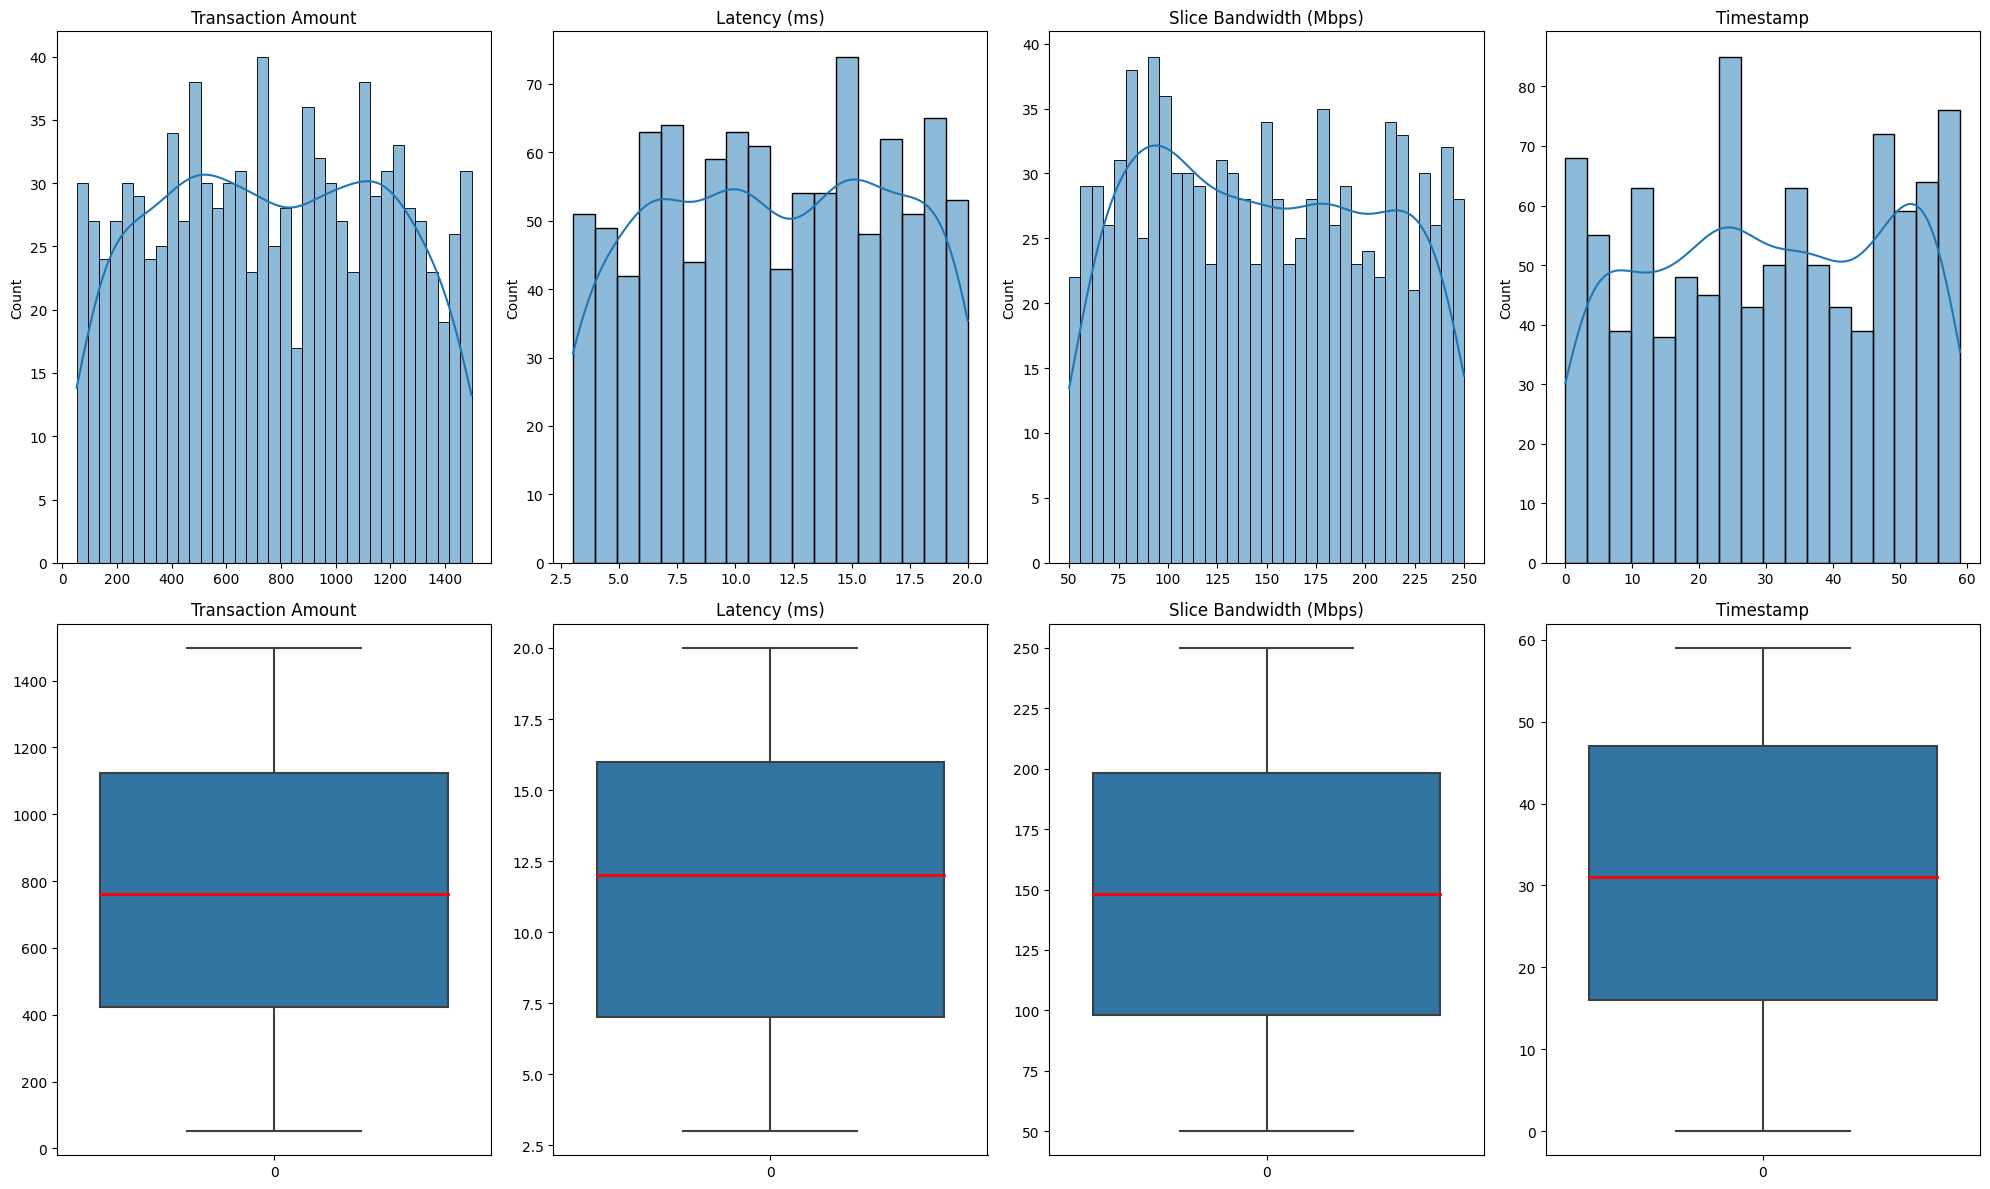

In [6]:
cols = ["Transaction Amount","Latency (ms)", "Slice Bandwidth (Mbps)", "Timestamp"] # ignore PIN Code column, because it's like a password

fig, axes = plt.subplots(2, len(cols), figsize=(20, 12))

for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, ax=axes[0, i], bins = (18 if col in ["Latency (ms)", "Timestamp"] else 35), kde = True)
    axes[0, i].set_title(col)
    axes[0, i].set_xlabel("")

for i, col in enumerate(cols):
    try:
        # Plot the boxplot on the second row of the grid
        sns.boxplot(data=df[col], ax=axes[1, i], medianprops={"color": "r", "linewidth": 2})
        axes[1, i].set_title(col)
        axes[1, i].set_xlabel("")
    except TypeError:
        print(f"Can't BoxPlot the {col} column because it's not numeric.")


fig.savefig("/kaggle/working/initial_hist_and_boxplot.png")  # Salvar imagem

plt.tight_layout()
plt.show()

### **Graphical Visualization of Distributions**
---

Upon examining the histograms and distributions, we can observe that the data is relatively evenly distributed between the maximum and minimum limits of each variable. This allows us to draw the following conclusions:

- **Absence of Outliers**: We have a "well-behaved" dataset, with values within the known variations and dispersions. This can be confirmed by the boxplot analysis.
- **Absence of Socioeconomic Segmentation**: The transaction amounts show a balanced distribution, with no apparent separation by social class within the database.
- **Variety in Connection Profiles**: The distribution of Slice Bandwidth (Mbps) indicates that there is no fixed pattern among users, suggesting the presence of both faster and slower connections in equal measure.
- **Latency (ms) Analysis**: Despite the presence of some valleys or gaps at specific frequencies, the data still shows a relatively constant distribution. These patterns will be explored further in the next stages.

This initial analysis suggests that the data is consistent and does not exhibit obvious biases regarding the variables analyzed, although specific aspects may require deeper investigation.

---
**Note**: If we had skewed data, such as a higher number of lower or higher transaction values, we could apply a logarithmic transformation to emphasize any differences in the following analyses. However, no transformation appears necessary at this stage.

## **Exploratory Analysis of the Relationship Between Categorical and Numeric Variables**
---

In this phase, we aim to identify potential relationships between categorical and numeric variables by analyzing data dispersion and interquartile variation. To achieve this, we employed **boxplots**, which are valuable tools for visualizing the distribution of a numeric variable across different categories, enabling us to detect patterns, skewness, and potential outliers.

### **Methodology**:  
We constructed a grid of boxplots for each numeric variable relative to each categorical variable of interest. To ensure the validity of the analysis, we excluded:

- Categorical variables representing unique identifiers (e.g., columns containing "ID" in their names), as they do not have statistical significance in data segmentation.
- The geolocation variable, which will be addressed later due to its spatial nature.

The construction of these plots aims to identify patterns in the distribution of numeric variables across different categories, evaluating variations in quartiles, interquartile range, and the presence of outliers.

Statistically significant relationships between these variables may suggest the need for deeper analyses, such as hypothesis testing or statistical modeling.


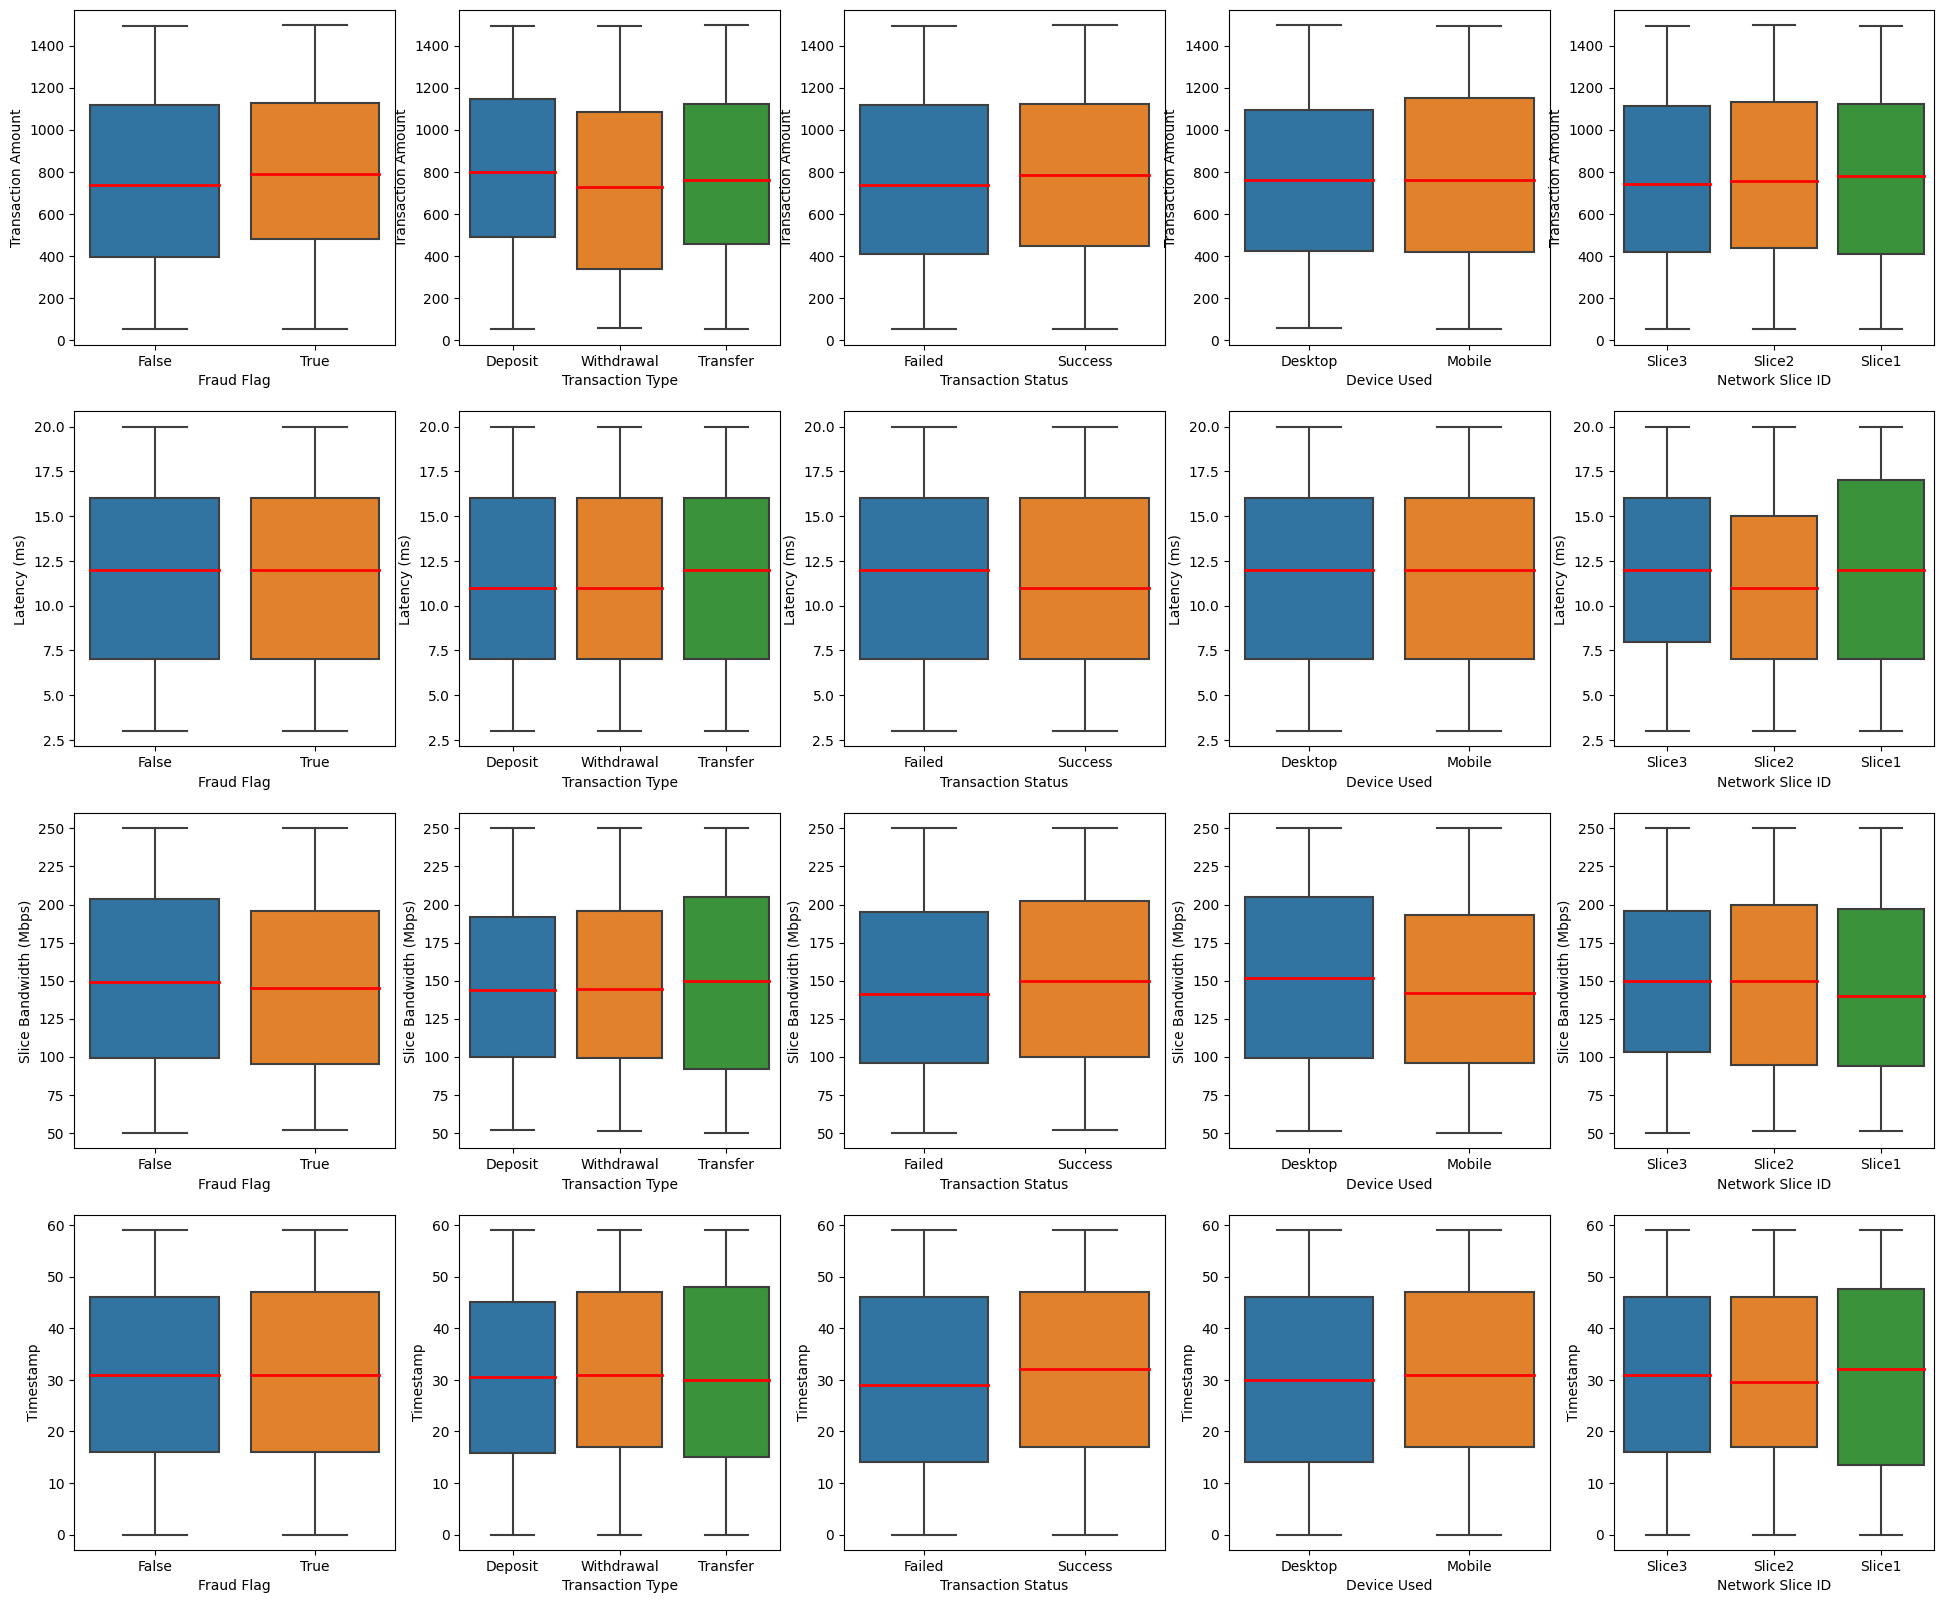

In [7]:
object_cols = ['Fraud Flag', 'Transaction Type', 'Transaction Status', 'Device Used', 'Network Slice ID']

cols = ["Transaction Amount","Latency (ms)", "Slice Bandwidth (Mbps)", "Timestamp"] # ignore PIN Code column, because it's like a password

n,m = len(cols), len(object_cols)

# Criando múltiplos gráficos lado a lado
fig, axes = plt.subplots(n, m , figsize=(6*n, 4*m))

for i, col in enumerate(cols):
    for j, col_obj in enumerate(object_cols):
        try:
            # Plot the boxplot on the second row of the grid
            sns.boxplot(data=df, x = col_obj, y = col, ax=axes[i, j], medianprops={"color": "r", "linewidth": 2})
            axes[i, j].set_xlabel(col_obj)
        except TypeError:
            print(f"Can't BoxPlot the {col} column because it's not numeric.")

## **Identification of Possible Relationships Between Variables**  
---

Based on the exploratory analysis of the boxplots, we identified several potential relationships between numeric and categorical variables due to the observed variations in the quartiles:

- **Latency (ms) × Network Slice ID**
- **Transaction Amount × Transaction Type**
- **Slice Bandwidth (Mbps) × Device Used**
- **Timestamp × Transaction Status**
- **Slice Bandwidth (Mbps) × Transaction Status**
- **Latency (ms) × Transaction Status**

### **Criteria for Selection**:  
The primary criterion used for selecting these potential relationships was the presence of visible differences in the quartiles, suggesting that certain categories may be associated with significant variations in the distributions of numeric variables.

### **Statistical Interpretation**:  
Although these apparent variations are evident, we must consider the **artificial nature of the data**, which may affect the reliability of the analysis. Observations include:

1. The boxplots show **high dispersion**, with values often lying at the upper and lower limits.
2. **No detectable outliers**, suggesting either pre-processing of the data or a distribution constrained by the simulation.
3. The variation between categories is **limited**, indicating **weak or nonexistent correlations** between the categorical and numeric variables.

### **Recommended Next Steps**:  
To validate these findings, it is recommended to apply **formal statistical tests**, such as:

- **ANOVA** or **Kruskal-Wallis tests** to check for significant differences between categorical groups.
- **Spearman's rank correlation** to assess monotonic relationships between ordinal categorical and numeric variables.

This approach will allow us to confirm whether the visual differences genuinely reflect statistically relevant relationships or are merely random fluctuations within the data.

## Geolocation Processing
---

In [8]:
df_geo = pd.DataFrame(df["Geolocation (Latitude/Longitude)"].value_counts().keys()) # unique values

# Getting the Lat and Lon numbers
df_geo[["Latitude", "Longitude"]] = df_geo["Geolocation (Latitude/Longitude)"].str.replace("N", "").str.replace("W", "").str.split(",", expand=True)
df_geo["Latitude"] = df_geo["Latitude"].astype(float)
df_geo["Longitude"] = df_geo["Longitude"].astype(float)

df_geo.head() #check the data

Geolocation (Latitude/Longitude)  Latitude  Longitude
0            48.8566 N, 139.6917 W   48.8566   139.6917
1              51.5074 N, 0.1278 W   51.5074     0.1278
2             55.7558 N, 37.6173 W   55.7558    37.6173
3             55.7558 N, -74.006 W   55.7558   -74.0060
4              35.6895 N, 2.3522 W   35.6895     2.3522

In [9]:
# Building the map
m = folium.Map(location=[df_geo["Latitude"].mean(), df_geo["Longitude"].mean()], zoom_start=2)

# Add markers
for _, row in df_geo.iterrows():
    folium.Marker(
        location=[float(row["Latitude"]), float(row["Longitude"])],
        popup=row.get("Geolocation (Latitude/Longitude)", "Sem endereço"),
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(m)

m

## **Geolocation Data Analysis**  
---

Upon reviewing the geolocation data, we observe that the location information appears to have been **masked** or **artificially generated**. The data points seem to be evenly spaced in **latitude** across 5 or 6 rows, with 5 columns of **longitude**, which suggests that these are **synthetic** data points, possibly created for testing purposes.

As a result, since these geolocation data points lack any realistic or meaningful geographical distribution, it is not feasible to conduct any **geolocation-based analysis** to detect patterns in user behavior or transaction locations.  

While it is technically possible to categorize these data points into groups that could represent different **cities, states**, or **countries**, further analysis reveals that these data points are unlikely to reveal any useful insights. Instead, the dataset consists mainly of **constant values** and an added element of **randomness**.  

In conclusion, this dataset does not provide any actionable geolocation information and is not suitable for detecting geographic patterns related to user behavior or transaction trends.


# Exploratory Data Analysis  
---  

We begin with exploratory data analysis. In this case, we can focus on a specific aspect, such as **fraud detection**, by basing our research on the **"Fraud Flag"** column. However, we can also conduct broader analyses to identify potential issues or general patterns in the data.  

### **Analysis Focus**  
To start, I will perform a **targeted analysis of fraud**, aiming to identify explanations for fraudulent and non-fraudulent transactions. Later, I will conduct **general exploratory analyses** to uncover potential patterns and insights within the dataset.  

## Fraud Analysis  
---  

The first point of analysis is that our dataset is **balanced** in terms of fraud occurrences. This is an **uncommon scenario** for fraud analysis, as we typically expect fraudulent banking transactions to be a **minority**, requiring the use of specialized metrics or statistical balancing techniques.  

Nevertheless, we continue to explore potential **correlations** or **explanations** within the data, aiming to provide insights for businesses seeking to understand **non-problematic transactions** more effectively.  

Fraud Flag
False    519
True     481
Name: count, dtype: int64


<Axes: ylabel='count'>

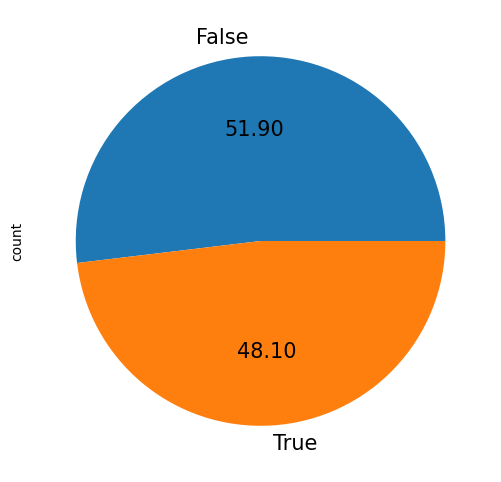

In [10]:
print(df["Fraud Flag"].value_counts())
df["Fraud Flag"].value_counts().plot.pie(
    autopct="%.2f",
    fontsize=15,
    figsize=(6, 6)
)

## **Normality Test for Transaction Amount**  
---  

To assess the **distribution** of transaction amounts in fraudulent and non-fraudulent transactions, we applied **Shapiro-Wilk's test**. This test is suitable for **small samples** (≈1000 observations), and since there are **no outliers**, it provides a reliable normality assessment.  

For larger datasets, **D'Agostino's K-squared test** could be an alternative.  

In [11]:
from scipy.stats import shapiro, normaltest

df_fraud = df[df['Fraud Flag'] == True]
df_non_fraud = df[df['Fraud Flag'] == False]

# Shapiro-Wilk test for fraud transactions
stat_f, p_f = shapiro(df_fraud['Transaction Amount'])
print(f"Fraudulent Transactions -> Shapiro: stat={stat_f:.4f}, p={p_f:.4f}")

# Shapiro-Wilk test for non-fraud transactions
stat_nf, p_nf = shapiro(df_non_fraud['Transaction Amount'])
print(f"Non-Fraudulent Transactions -> Shapiro: stat={stat_nf:.4f}, p={p_nf:.4f}")

Fraudulent Transactions -> Shapiro: stat=0.9625, p=0.0000
Non-Fraudulent Transactions -> Shapiro: stat=0.9542, p=0.0000


**Interpretation**

- **Null Hypothesis (H₀)**: The data follows a **normal distribution**.
- If **p < 0.05**, we **reject H₀**, meaning the data **does not follow a normal distribution**.

**Results**

Since **p < 0.05** for both groups, **we reject the null hypothesis**, confirming that the **Transaction Amount does not follow a normal distribution**—a result that aligns with our expectations.

## **T-Test for Comparing Means of Fraudulent vs. Non-Fraudulent Transactions**  
---  

Despite knowing that the data does not follow a normal distribution, we conduct a **T-test** to test our understanding of hypothesis testing. The **T-test** compares the **means** of two independent groups (fraudulent and non-fraudulent transactions).  

Since we assume that the variances between the two groups are **different**, we use the **Welch's T-test** by setting `equal_var=False`.

### **Implementation**


In [12]:
from scipy.stats import ttest_ind

# Perform Welch's T-test assuming unequal variances
t_stat, p_val = ttest_ind(df_fraud['Transaction Amount'],
                          df_non_fraud['Transaction Amount'],
                          equal_var=False)

# Calculate variance for both groups
var_fraud = df_fraud['Transaction Amount'].var()
var_non_fraud = df_non_fraud['Transaction Amount'].var()

print(f"Variance of Fraudulent Transactions: {var_fraud:.2f} vs Variance of Non-Fraudulent Transactions: {var_non_fraud:.2f}.")
print(f"T-test: t={t_stat:.4f}, p={p_val:.4f}")

Variance of Fraudulent Transactions: 159232.73 vs Variance of Non-Fraudulent Transactions: 177768.45.
T-test: t=1.2245, p=0.2211


**Interpretation**

- **Null Hypothesis (H₀)**: The **means** of fraudulent and non-fraudulent transactions are **equal**.
- **Alternative Hypothesis (H₁)**: The **means** of fraudulent and non-fraudulent transactions are **different**.

Given that the **p-value** is **0.2211**, which is greater than the common significance level of **0.05**, there is **insufficient statistical evidence** to reject the null hypothesis.

**Conclusion**

This result suggests that, based on the **Transaction Amount metric**, we cannot conclude that fraudulent transactions differ significantly from non-fraudulent ones. In other words, **the Transaction Amount alone does not provide a clear distinction between fraud and non-fraud**.

## **Mann-Whitney U Test for Comparing Distributions of Fraudulent vs. Non-Fraudulent Transactions**  
---  

We apply the **Mann-Whitney U test**, a **non-parametric test**, to compare the distributions of **fraudulent** and **non-fraudulent transactions**. Unlike the T-test, which assumes normality, the **Mann-Whitney U test** does not require the data to follow a normal distribution, making it appropriate for this scenario.  

### **Implementation**


In [13]:
from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U test for two independent samples
u_stat, p_val = mannwhitneyu(df_fraud['Transaction Amount'],
                             df_non_fraud['Transaction Amount'],
                             alternative='two-sided')

print(f"Mann-Whitney U: stat={u_stat:.4f}, p={p_val:.4f}")

Mann-Whitney U: stat=130520.5000, p=0.2116


**Interpretation**

- **Null Hypothesis (H₀)**: The **distributions** of fraudulent and non-fraudulent transactions are **identical**.
- **Alternative Hypothesis (H₁)**: The **distributions** of fraudulent and non-fraudulent transactions are different.

Given the **p-value of 0.2116**, which is greater than the typical significance level of **0.05**, we **fail to reject the null hypothesis**. This means there is **no statistical evidence** to suggest that the distributions of fraudulent and non-fraudulent transactions differ significantly.

**Conclusion**

Despite the possibility that the data may not follow a normal distribution, the **Transaction Amount metric** does not show a clear distinction between **fraudulent** and **non-fraudulent transactions**. In essence, **we cannot conclude that frauds and non-frauds differ significantly in terms of transaction amount.**

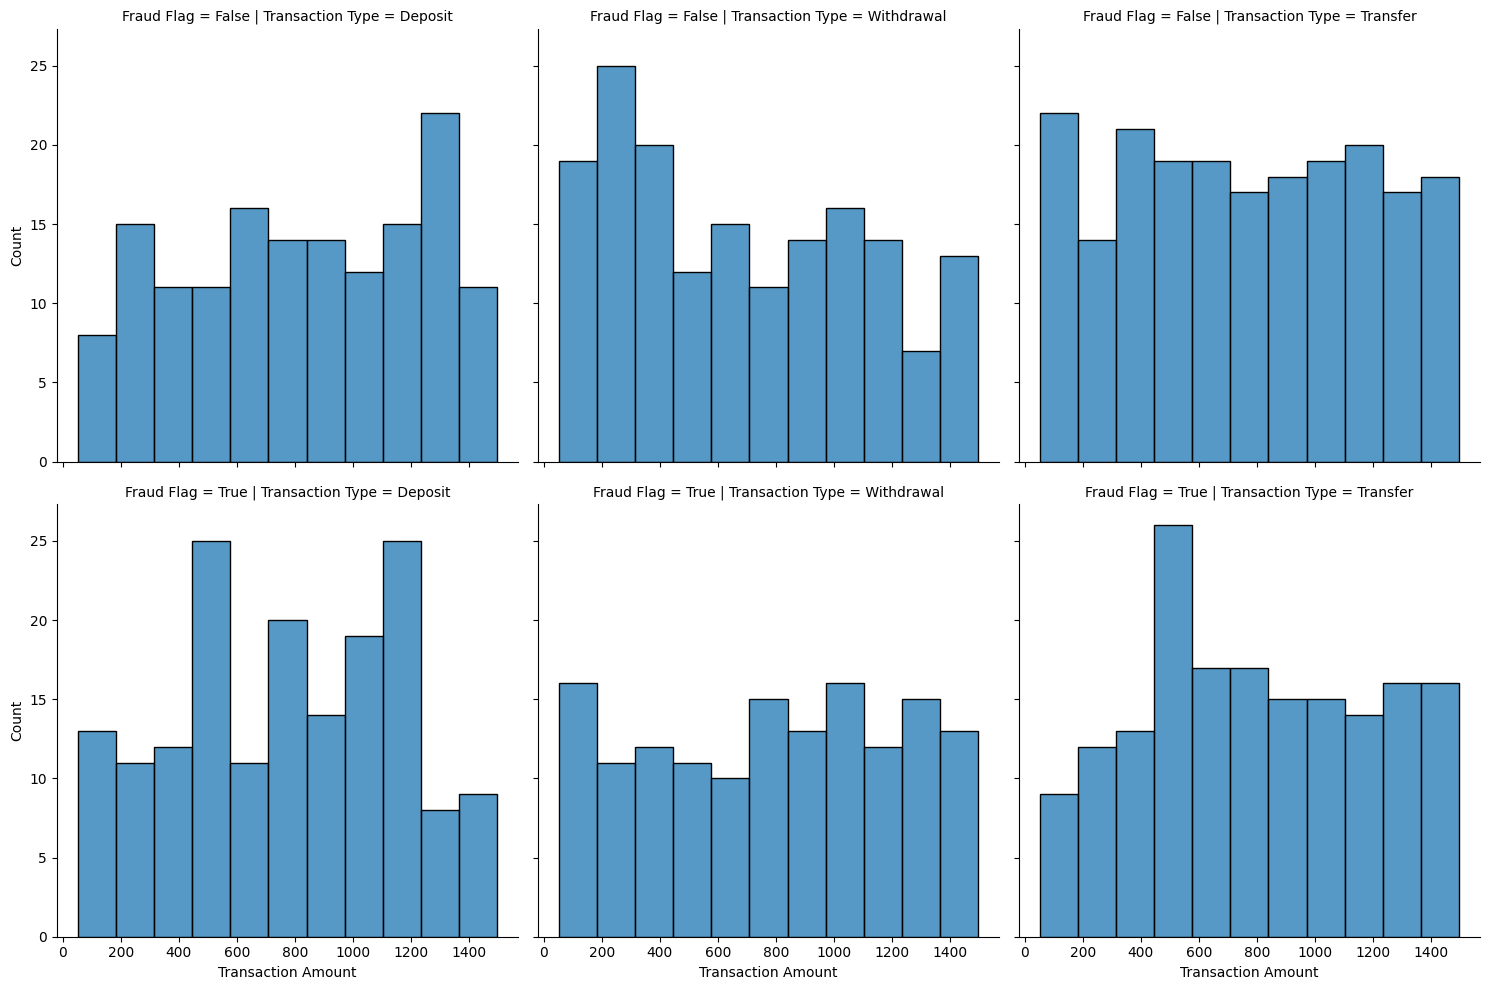

In [14]:
sns.displot(
    df, x = "Transaction Amount", col = "Transaction Type", row = "Fraud Flag"
)

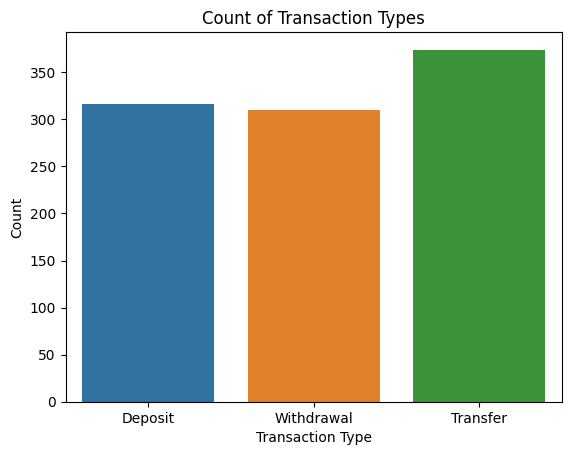

In [15]:
sns.countplot(x='Transaction Type', data=df)
plt.title('Count of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

---

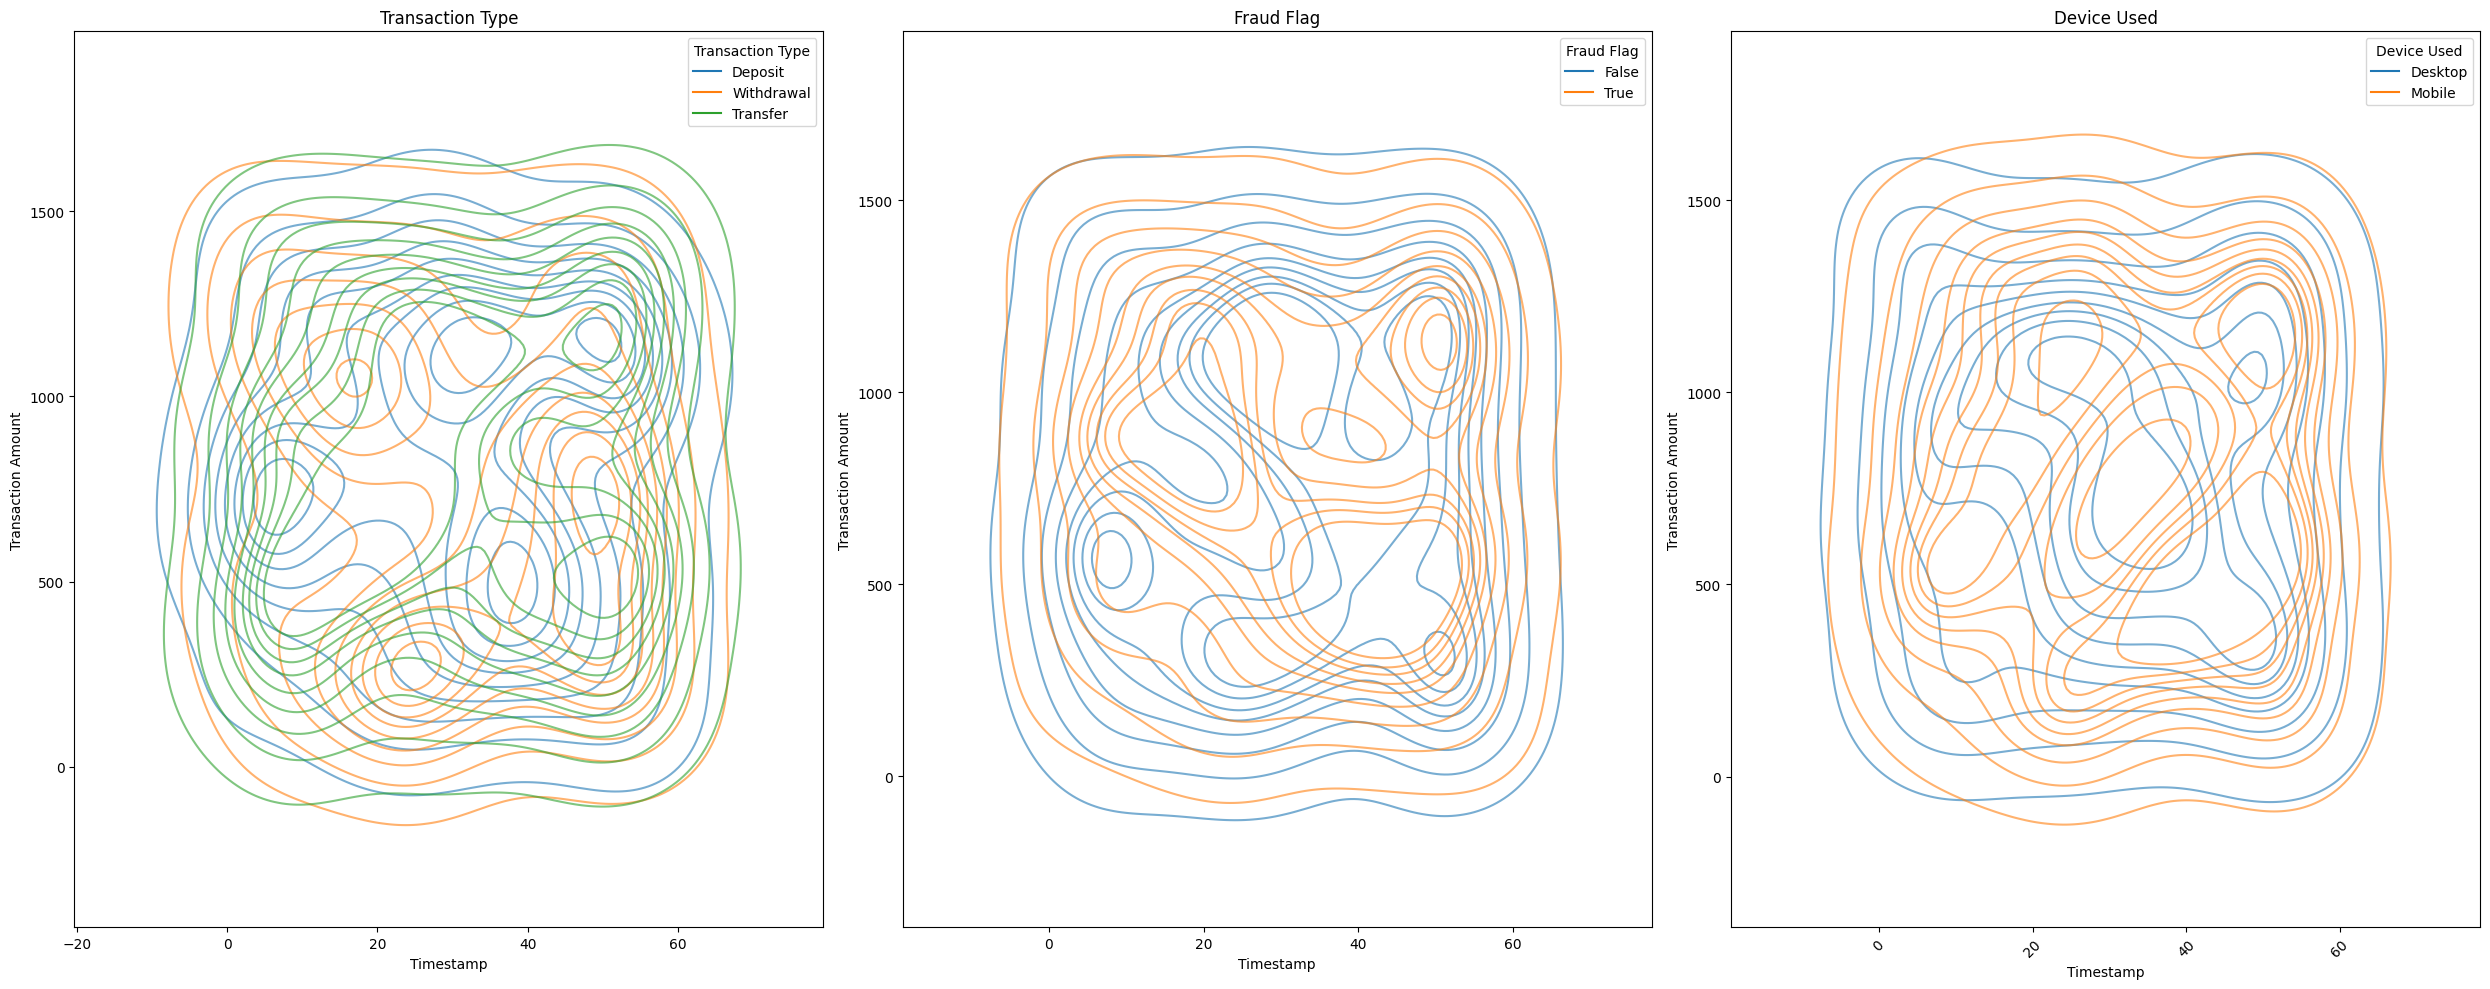

In [16]:
coluns = ["Transaction Type", "Fraud Flag", "Device Used"]

# Criando múltiplos gráficos lado a lado
fig, axes = plt.subplots(1, len(coluns), figsize=(25, 10))

for i, hue in enumerate(coluns):
    # Usando sns.kdeplot para criar gráficos de densidade
    sns.kdeplot(
        data=df,
        x="Timestamp",
        y="Transaction Amount",
        hue=hue,
        ax=axes[i],
        fill=False,
        alpha=0.6
    )
    axes[i].set_title(hue)
    axes[i].set_xlabel("Timestamp")
    axes[i].set_ylabel("Transaction Amount")
    plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x

plt.tight_layout()
plt.show()

**Analysis of Categorical Variable Distribution**

From the analysis, we observe that the categorical variables "Transaction Type", "Fraud Flag", and "Device Used" are evenly distributed, showing no correlation with "Timestamp" or "Transaction Amount".

This indicates that, in relation to time and transaction volume:

- There is **no discernible pattern** in transaction types.
- There are **no preferred time periods** or specific transaction amount patterns.
- As expected, the **device type neither influences nor is influenced** by transaction times or amounts.

These findings suggest that transactions occur randomly across different categories, with no clear temporal or quantitative trends.

---

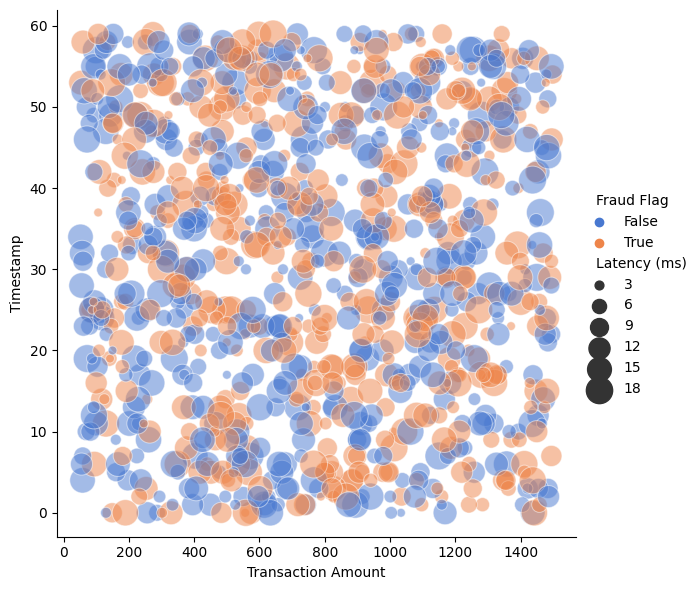

In [17]:
sns.relplot(
    data = df, x="Transaction Amount", y="Timestamp", hue="Fraud Flag", size = "Latency (ms)",
    sizes=(40, 400), alpha=.5, palette="muted",
    height=6
)

**Interpretation of the Bubble Chart and Analysis**

The objective of this visualization is to identify potential relationships between the axes and the legend elements, specifically regarding color and size.

For instance, we aimed to determine whether there is any correlation between **transaction time or transaction value** and **latency**. A reasonable expectation would be that latency increases during peak hours, which would be visually represented by **larger circles**. Additionally, we examined whether the **color distribution** of the points indicated a relationship between transaction time, transaction value, and fraud occurrences.

However, the results do not indicate any significant patterns or relationships in the data. There is no clear variation in **circle sizes** that would suggest an increase in latency at specific times, nor is there a distinct **color separation** that would imply a correlation between time, transaction value, and fraud.

---

## Correlation Analysis between Columns

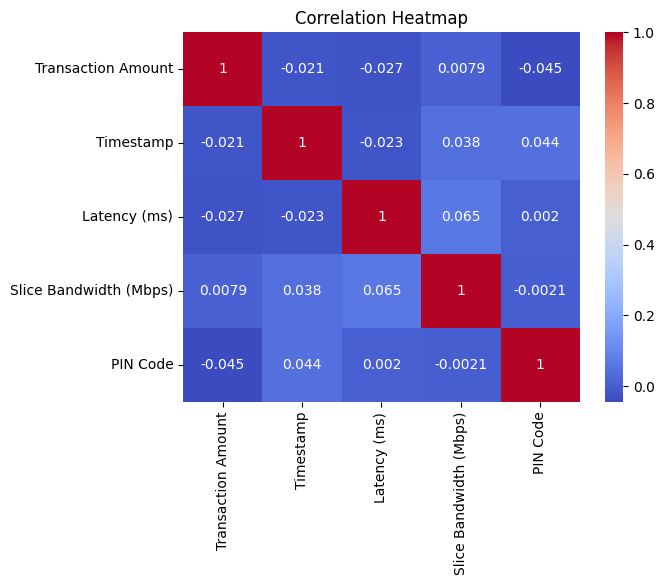

In [18]:
# Correlation heatmap for numeric features
df_num = df.select_dtypes(include=[np.number])

correlation_matrix = df_num.corr(method="spearman")

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Cramér's V (Fraud Flag x Transaction Type): 0.0651
Cramér's V (Fraud Flag x Transaction Status): 0.0110
Cramér's V (Fraud Flag x Device Used): 0.0637
Cramér's V (Fraud Flag x Network Slice ID): 0.0519
Cramér's V (Fraud Flag x Fraud Flag): 0.9980


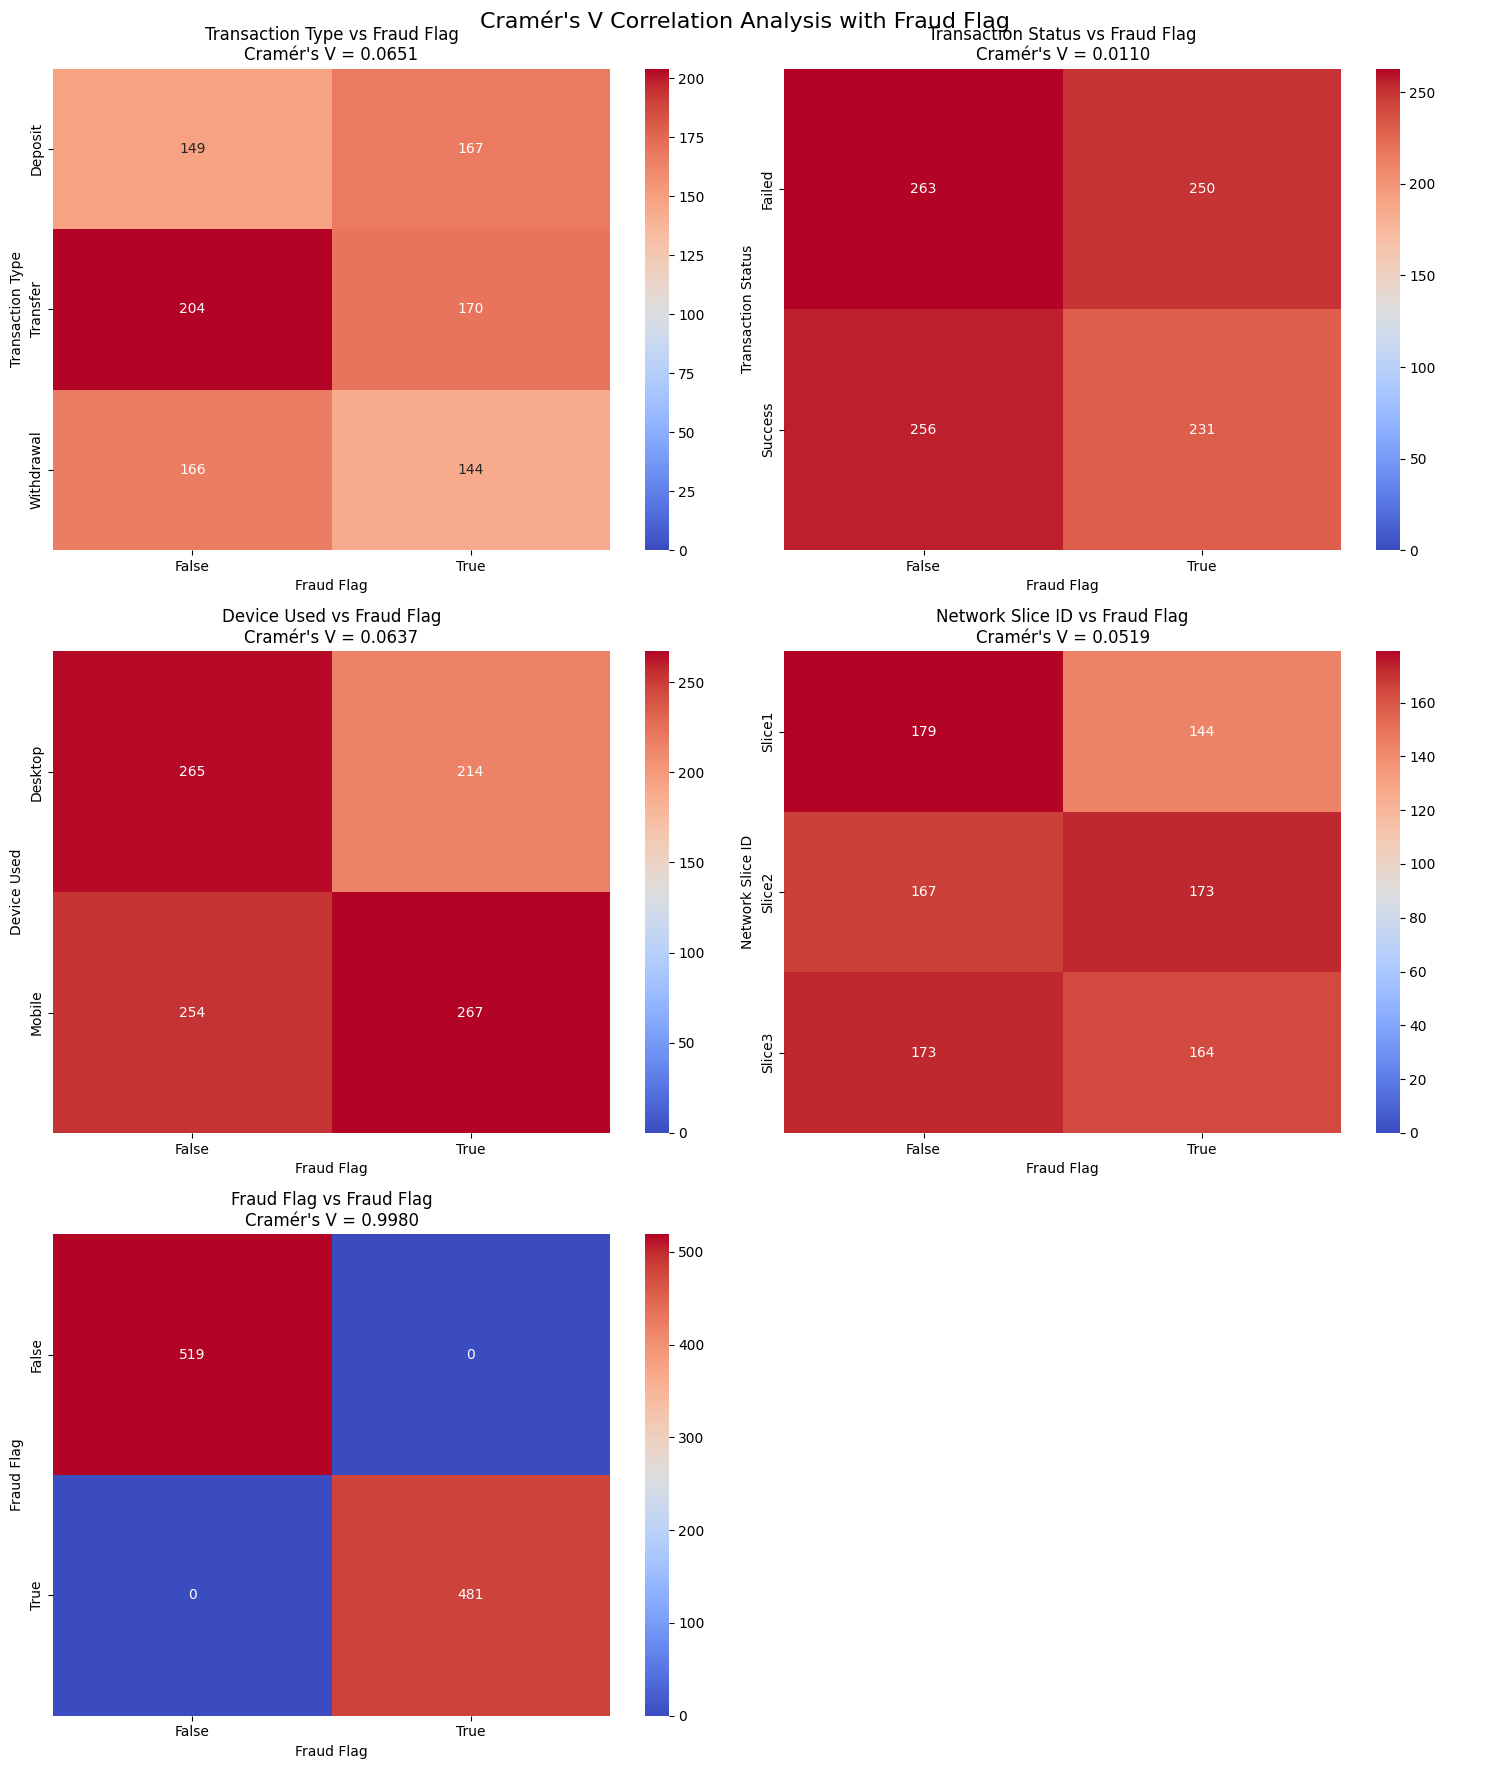

In [19]:
# Function to calculate Cramér's V
def cramers_v(contingency_table):
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Function to create a heatmap and calculate Cramér's V
def correlation_2_categorical(df: pd.DataFrame, x: str, y: str) -> tuple[plt.Figure, float]:
    # 1. Create a contingency table (count of combinations)
    contingency_table = pd.crosstab(df[y], df[x])

    # 2. Calculate Cramér's V
    cramers_v_value = cramers_v(contingency_table)
    print(f"Cramér's V ({x} x {y}): {cramers_v_value:.4f}")
    
    return cramers_v_value

# Define the columns to analyze
cols = ["Transaction Type", "Transaction Status", "Device Used", "Network Slice ID", "Fraud Flag"]

# Create a figure with 2 columns and 3 rows
fig, axes = plt.subplots(3, 2, figsize=(15, 18))  # 3 rows, 2 columns
fig.suptitle("Cramér's V Correlation Analysis with Fraud Flag", fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the columns and generate plots
for i, cat in enumerate(cols):
    # Generate the correlation plot and Cramér's V value
    cramers_v_value = correlation_2_categorical(df, "Fraud Flag", cat)
    
    # Plot in the appropriate subplot
    contingency_table = pd.crosstab(df[cat], df["Fraud Flag"])
    sns.heatmap(contingency_table, annot=True, fmt="d", cmap="coolwarm", ax=axes[i], vmin = 0) # from 0 because we want to show the correlation value
    axes[i].set_title(f"{cat} vs Fraud Flag\nCramér's V = {cramers_v_value:.4f}")
    axes[i].set_ylabel(cat)
    axes[i].set_xlabel("Fraud Flag")

# Hide the last (empty) subplot
axes[-1].axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()

**Cramér’s V Analysis for Categorical Variables**

In this analysis, we applied `Cramér’s V correction` to evaluate whether categorical variables exhibit relationships with each other, based on the differences in observed frequencies. Generally, if Cramér’s V is close to 0, it indicates that the columns are independent. Conversely, if it approaches 1, it suggests a strong correlation between the categories.

The calculated correlations are as follows:
|   Variables Analyzed                  | Cramér's V | Correlation Level  |
|---------------------------------------|------------|---------------------|
| Fraud Flag x Transaction Type         | 0.0651     | Low                |
| Fraud Flag x Transaction Status       | 0.0110     | Low                |
| Fraud Flag x Device Used              | 0.0637     | Low                |
| Fraud Flag x Network Slice ID         | 0.0519     | Low                |
| Fraud Flag x Fraud Flag               | 0.9980     | High               |


To validate the effectiveness of `Cramér’s V` as a correlation measure, we created a control correlation plot using a duplicated Fraud Flag column. Since fraud should always correspond to fraud, the expected correlation value is 1, and our calculated value of approximately 0.998 confirms this expectation.

For the other variables, there is virtually no correlation, as all values remain below 0.07, which is very close to zero. This suggests a weak or negligible relationship between the categorical features analyzed.

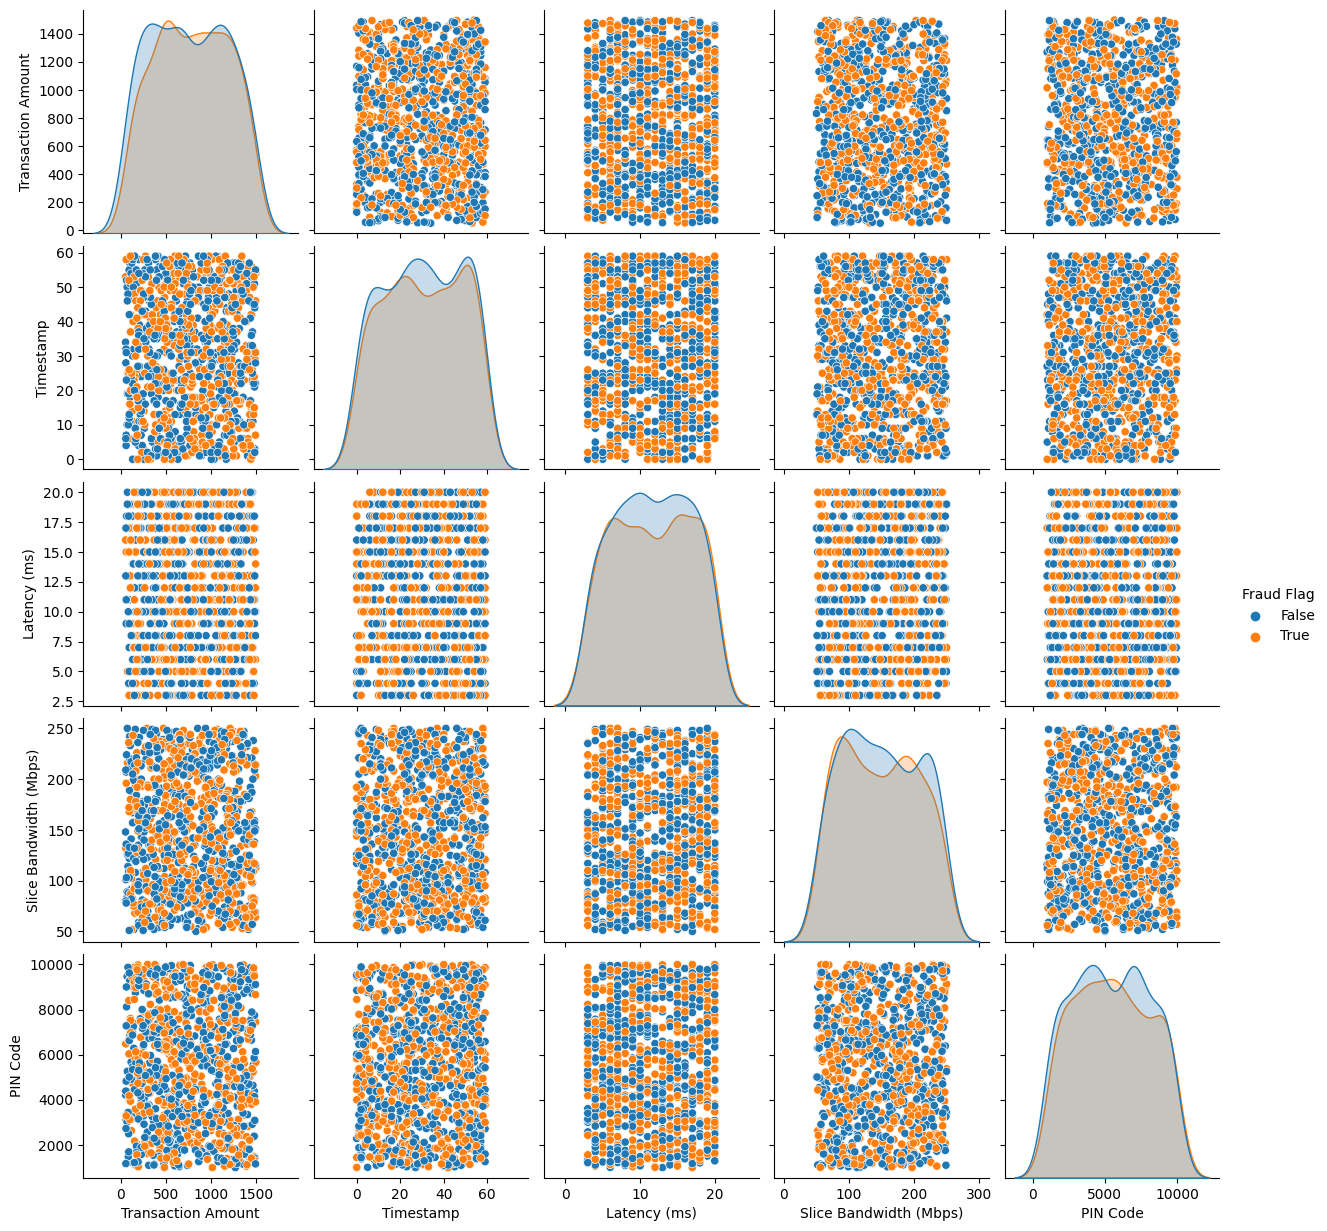

In [20]:
# Vamos verificar a distribuição dos dados com base na coluna de fraud flag

# Não encontramos nenhum padrão gráfico claro nos dados
fig = sns.pairplot(data=df, hue = "Fraud Flag")
fig

As we can see from the scatter plots below or above the main diagonal, the distribution of points—regardless of whether they represent fraud or not—is practically constant within the range of minimum and maximum values, independent of the columns.

It is worth noting that the numerical PIN Code column represents a password and, as such, does not necessarily correlate with any other relevant information.

**Initial Conclusion from the Diagonal**: None of the variables, on their own, provide a clear separation between Fraud and Non-Fraud. This does not mean they are entirely useless for prediction, but it suggests that combining variables (or creating new features) will likely be necessary to distinguish fraudulent transactions from legitimate ones.

**Conclusion from the Off-Diagonal Information**: There is no visible linear or non-linear relationship between pairs of variables, nor is there a distinct cluster that stands out for fraudulent transactions. This suggests the following:

The variables may exhibit correlations in higher dimensions (which are difficult to visualize in simple scatter plots).

Other variables, beyond the numerical ones, may be required to explain fraud.

Fraudulent activities may be widely dispersed across these four axes, making simple separation challenging.

In summary, the lack of clear patterns in the scatter plots indicates that fraud detection in this dataset may require more sophisticated techniques, such as feature engineering or multidimensional analysis, to uncover meaningful insights.

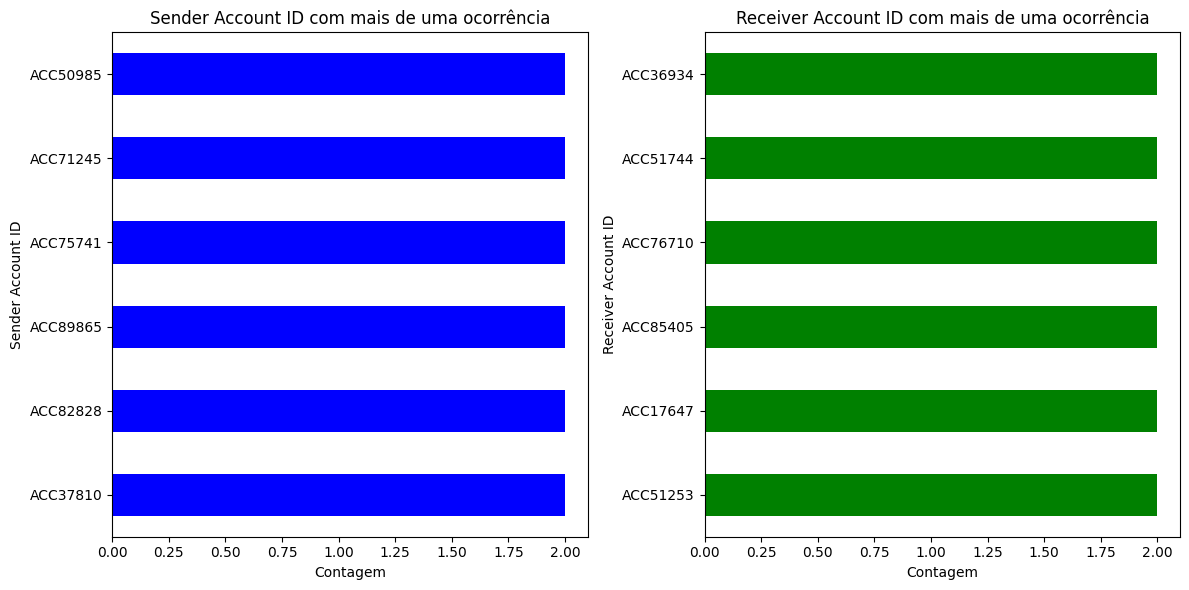

In [21]:
# Contar as ocorrências de cada "Sender Account ID" e "Receiver Account ID"
sender_counts = df["Sender Account ID"].value_counts()
receiver_counts = df["Receiver Account ID"].value_counts()

# Filtrar apenas os valores que aparecem mais de uma vez
sender_counts_filtered = sender_counts[sender_counts > 1]
receiver_counts_filtered = receiver_counts[receiver_counts > 1]

# Criar subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotar o gráfico de Sender Account ID
sender_counts_filtered.plot(kind='barh', ax=ax1, color='blue')
ax1.set_title('Sender Account ID com mais de uma ocorrência')
ax1.set_xlabel('Contagem')
ax1.set_ylabel('Sender Account ID')

# Plotar o gráfico de Receiver Account ID
receiver_counts_filtered.plot(kind='barh', ax=ax2, color='green')
ax2.set_title('Receiver Account ID com mais de uma ocorrência')
ax2.set_xlabel('Contagem')
ax2.set_ylabel('Receiver Account ID')

# Ajustar layout e mostrar os gráficos
plt.tight_layout()
plt.show()

We observed that very few individuals sent or received more than one transaction during the period, which is not unusual considering the one-hour range in the Timestamp column. However, due to the limited number of occurrences, we were unable to conduct personality analyses or determine whether any individuals were fraudsters engaging in multiple fraudulent transfers.

# Conclusion
---

Throughout this analytical process, it became evident that the dataset exhibited consistent behavioral patterns across nearly all numerical and categorical columns. The data demonstrated no significant outliers, imbalances, skewness, errors, or missing values, suggesting a highly controlled generation process. Hypothesis testing further revealed that the dataset was likely constructed using constant base values, supplemented by masking techniques and randomized noise to simulate real-world data. However, this artificial replication proved insufficient to emulate authentic data characteristics convincingly.

Despite these limitations, **the primary objective of this study was successfully achieved**. The analysis served as a practical exercise to demonstrate proficiency in exploratory data analysis (EDA) and data-driven storytelling techniques. While certain initial assumptions were later invalidated during the investigation, these were intentionally retained to illustrate the iterative and hypothesis-driven nature of real-world analytical workflows.

Notably, advanced analytical methodologies—such as regression analysis for feature importance evaluation, entropy-based metrics via Random Forest algorithms, or temporal pattern detection through ANOVA or time-series decomposition—were intentionally excluded from this scope. These techniques, while powerful for uncovering latent relationships or hierarchical dependencies, were deemed unnecessary given the dataset’s inherent constraints. Specifically, the absence of meaningful correlations, behavioral patterns, or actionable insights related to banking system usage rendered predictive or inferential modeling exercises impractical.

In summary, the application of complex machine learning or statistical models would have been superfluous without a clearly defined problem statement or actionable business objective. This analysis reaffirms the importance of aligning methodological rigor with contextual relevance in data science endeavors.